In [2]:
# Import Packages
import numpy as np
import pandas as pd
import pylab as plt
%pylab inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Read in Accelerometer Data from Smartphones and Smartwatches

In [3]:
# Read in phone accelerometer data
papath = 'Activity Recognition exp/Activity Recognition exp/Phones_accelerometer.csv'

paccel = pd.read_csv(papath)
paccel.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633908,1424696631913248572,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631918283972,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631928385290,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,stand
4,4,1424696633929,1424696631933420691,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,stand


In [4]:
# Read in watch accelerometer data
wapath = 'Activity Recognition exp/Activity Recognition exp/Watch_accelerometer.csv'

waccel = pd.read_csv(wapath)
waccel.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696638740,27920678471000,-0.565032,-9.572019,-0.614113,a,gear,gear_1,stand
1,1,1424696638740,27920681910000,-0.832584,-9.713276,-0.606930,a,gear,gear_1,stand
2,2,1424696638740,27920692014000,-1.018134,-9.935339,-0.544082,a,gear,gear_1,stand
3,3,1424696638741,27920701983000,-1.222838,-10.142437,-0.566229,a,gear,gear_1,stand
4,4,1424696638741,27920711906000,-1.577180,-10.480618,-0.402824,a,gear,gear_1,stand


In [5]:
# Check for missing values
for df in [paccel, waccel]:
    print(df.isna().sum()) #nan values are present only in gt where we expect them

Index                  0
Arrival_Time           0
Creation_Time          0
x                      0
y                      0
z                      0
User                   0
Model                  0
Device                 0
gt               1783200
dtype: int64
Index                 0
Arrival_Time          0
Creation_Time         0
x                     0
y                     0
z                     0
User                  0
Model                 0
Device                0
gt               520357
dtype: int64


### Visualize Accelerometer Differences Between User, Model, Device, and Task

In [7]:
#Get Unique Column Values for phone and watch acceleration data

vals = pd.DataFrame({'Index':range(0,12)})

for col in ['User','Model','Device','gt']:
    arr = np.unique(pd.concat([paccel[col].astype(str), waccel[col].astype(str)]))
    vals[col] = np.concatenate([arr, [0]*(12-len(arr))])

vals.replace(0,'').drop(columns='Index').rename(columns={'gt':'Task'}) #Show all unique values

,User,Model,Device,Task
0,a,gear,gear_1,bike
1,b,lgwatch,gear_2,nan
2,c,nexus4,lgwatch_1,sit
3,d,s3,lgwatch_2,stairsdown
4,e,s3mini,nexus4_1,stairsup
5,f,samsungold,nexus4_2,stand
6,g,,s3_1,walk
7,h,,s3_2,
8,i,,s3mini_1,
9,,,s3mini_2,


In [8]:
# Plot timeseries of z-paccel between sitting and stairsup

cond = (paccel['User']=='a')&(paccel['Model']=='nexus4')&(paccel['Device']=='nexus4_1') # General condition

sit = paccel[['z','User','Model','gt']].loc[cond & (paccel['gt']=='sit')]
stup = paccel[['z','User','Model','gt']].loc[cond &(paccel['gt']=='stairsup')]
print(sit.shape[0])
print(stup.shape[0])

59954
43174


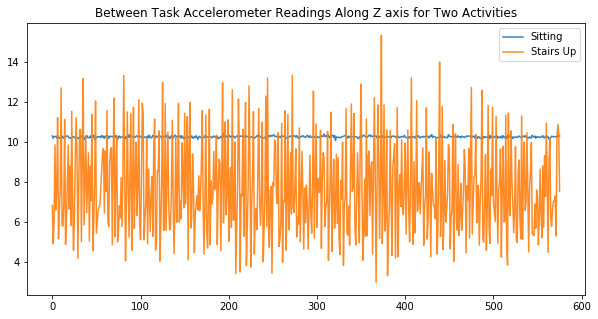

In [9]:
# Plot series

plt.figure(figsize=(10,5))
plt.plot(sit['z'].values[:stup.shape[0]:75], alpha=0.9) # truncate to length of stup
plt.plot(stup['z'].values[::75], alpha=0.9)
plt.legend(['Sitting', 'Stairs Up'])
plt.title('Between Task Accelerometer Readings Along Z axis for Two Activities');

In [10]:
# Compare z-axis paccelerometer readings between models within subject and task.

cond = (paccel['User']=='a')&(paccel['gt']=='sit')

s3 = paccel[['z','User','Model','gt']].loc[cond & (paccel['Model']=='s3') & (paccel['Device']=='s3_1')]
nex4 = paccel[['z','User','Model','gt']].loc[cond & (paccel['Model']=='nexus4') & (paccel['Device']=='nexus4_1')]
print(s3.shape[0])
print(nex4.shape[0])

30121
59954


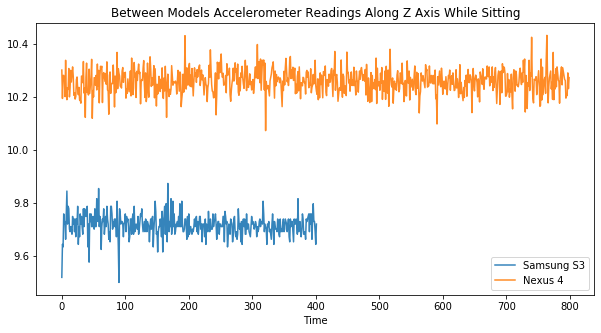

In [13]:
# Plot series

plt.figure(figsize=(10,5))
plt.plot(s3['z'].values[::75], alpha=0.9)
plt.plot(nex4['z'].values[::75], alpha=0.9) #truncate to length of s3
plt.legend(['Samsung S3', 'Nexus 4'])
plt.title('Between Models Accelerometer Readings Along Z Axis While Sitting')
plt.xlabel('Time');

In [12]:
# Compare z-axis paccelerometer readings within task and model, between subject

cond = (paccel['Model']=='nexus4') & (paccel['Device']=='nexus4_1') & (paccel['gt']=='sit')

suba = paccel[['z','User','Model','gt']].loc[(paccel['User']=='a') & cond]
subc = paccel[['z','User','Model','gt']].loc[(paccel['User']=='c') & cond]
print(suba.shape[0])
print(subc.shape[0])

59954
53073


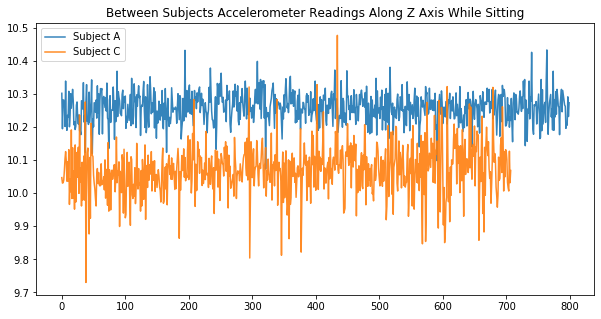

In [13]:
# Plot series

plt.figure(figsize=(10,5))
plt.plot(suba['z'].values[::75], alpha=0.9) # truncate to length of subb
plt.plot(subc['z'].values[::75], alpha=0.9)
plt.legend(['Subject A', 'Subject C'])
plt.title('Between Subjects Accelerometer Readings Along Z Axis While Sitting');

In [14]:
# Compare z-axis paccelerometer values between devices, within subject, model and task

cond = (paccel['Model']=='nexus4') & (paccel['User']=='a') & (paccel['gt']=='sit')

nex1 = paccel[['z']].loc[cond & (paccel['Device']=='nexus4_1')]
nex2 = paccel[['z']].loc[cond & (paccel['Device']=='nexus4_2')]
print(nex1.shape[0])
print(nex2.shape[0])

59954
59595


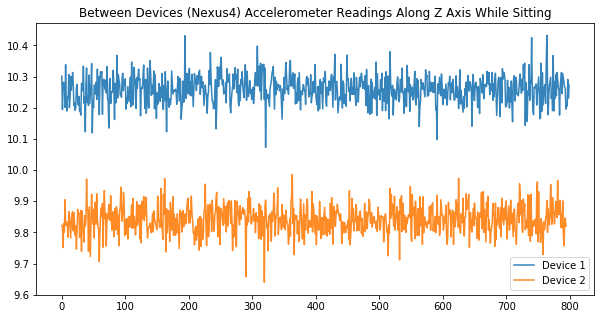

In [15]:
# Plot series

plt.figure(figsize=(10,5))
plt.plot(nex1['z'].values[::75], alpha=0.9)
plt.plot(nex2['z'].values[::75], alpha=0.9)
plt.legend(['Device 1', 'Device 2'])
plt.title('Between Devices (Nexus4) Accelerometer Readings Along Z Axis While Sitting');